In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-identification-with-decision-tree-b1/sample_submission.csv
/kaggle/input/digit-identification-with-decision-tree-b1/train.csv
/kaggle/input/digit-identification-with-decision-tree-b1/test.csv


In [ ]:
# https://www.kaggle.com/competitions/digit-identification-with-decision-tree-b1

In [95]:
data = pd.read_csv("/kaggle/input/digit-identification-with-decision-tree-b1/train.csv", header=None)
testdata = pd.read_csv("/kaggle/input/digit-identification-with-decision-tree-b1/test.csv", header=None)
ss = pd.read_csv("/kaggle/input/digit-identification-with-decision-tree-b1/sample_submission.csv")

In [96]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1,0,0,3,11,16,15,0,0,0,...,0,0,0,3,15,16,9,0,0,8
1,2,0,0,0,10,12,3,0,0,0,...,0,0,0,2,10,14,13,4,0,8
2,3,0,0,3,10,15,8,0,0,0,...,0,0,0,2,10,8,0,0,0,5
3,4,0,0,5,11,16,16,8,0,0,...,0,0,0,7,16,11,2,0,0,3
4,5,0,0,4,12,16,16,4,0,0,...,0,0,0,3,12,13,9,0,0,2


In [97]:
X = data.drop([0, 65], axis=1)
Xval = data.drop([0, 65], axis=1).values
X.head()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,0,0,3,11,16,15,0,0,0,0,...,4,0,0,0,3,15,16,9,0,0
1,0,0,0,10,12,3,0,0,0,0,...,9,0,0,0,2,10,14,13,4,0
2,0,0,3,10,15,8,0,0,0,0,...,0,0,0,0,2,10,8,0,0,0
3,0,0,5,11,16,16,8,0,0,0,...,0,0,0,0,7,16,11,2,0,0
4,0,0,4,12,16,16,4,0,0,0,...,0,0,0,0,3,12,13,9,0,0


In [98]:
y = data.loc[:, 65]
y.head()

0    8
1    8
2    5
3    3
4    2
Name: 65, dtype: int64

In [99]:
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1431,0,0,0,2,14,5,0,0,0,...,0,0,0,0,0,3,15,6,0,0
1,1432,0,0,0,13,12,0,0,0,0,...,12,0,0,0,1,10,16,14,4,0
2,1433,0,0,7,16,16,16,6,0,0,...,0,0,0,0,7,15,1,0,0,0
3,1434,0,2,15,15,6,0,0,0,0,...,1,0,0,3,15,14,11,2,0,0
4,1435,0,0,0,10,9,0,0,0,0,...,0,0,0,0,0,13,10,0,0,0


In [100]:
test_data = testdata.drop([0], axis=1)
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,0,0,0,2,14,5,0,0,0,0,...,0,0,0,0,0,3,15,6,0,0
1,0,0,0,13,12,0,0,0,0,0,...,12,0,0,0,1,10,16,14,4,0
2,0,0,7,16,16,16,6,0,0,0,...,0,0,0,0,7,15,1,0,0,0
3,0,2,15,15,6,0,0,0,0,0,...,1,0,0,3,15,14,11,2,0,0
4,0,0,0,10,9,0,0,0,0,0,...,0,0,0,0,0,13,10,0,0,0


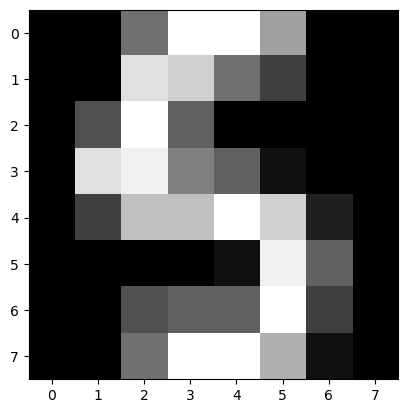

In [101]:
# visualising
import matplotlib.pyplot as plt

plt.imshow(Xval[123].reshape(8, 8), cmap='gray')

In [10]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

In [103]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(1144, 64)
(1144,)
(286, 64)
(286,)


In [34]:
# stadardization

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# test_data = sc.transform(test_data)

In [104]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [105]:
base_model = tree.DecisionTreeClassifier()

In [106]:
base_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
accuracy_score(base_model.predict(X_test),y_test)

0.8601398601398601

In [46]:
# help(tree.DecisionTreeClassifier)

# now we will explore the hyperparameters, keeping randomstate each time for consistent results

'''
criterion: Literal['gini', 'entropy', 'log_loss'] = "gini", 
 splitter: Literal['best', 'random'] = "best",
   max_depth: Int | None = None, 
   min_samples_split: float | int = 2, 
   min_samples_leaf: float | int = 1, 
   min_weight_fraction_leaf: Float = 0, 
   max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None, 
   random_state: Int | RandomState | None = None, 
   max_leaf_nodes: Int | None = None, 
   min_impurity_decrease: Float = 0, 
   class_weight: Mapping | str | Sequence[Mapping] | None = None, 
   ccp_alpha: float = 0) -> None

'''

'\ncriterion: Literal[\'gini\', \'entropy\', \'log_loss\'] = "gini", \n splitter: Literal[\'best\', \'random\'] = "best",\n   max_depth: Int | None = None, \n   min_samples_split: float | int = 2, \n   min_samples_leaf: float | int = 1, \n   min_weight_fraction_leaf: Float = 0, \n   max_features: float | int | Literal[\'auto\', \'sqrt\', \'log2\'] | None = None, \n   random_state: Int | RandomState | None = None, \n   max_leaf_nodes: Int | None = None, \n   min_impurity_decrease: Float = 0, \n   class_weight: Mapping | str | Sequence[Mapping] | None = None, \n   ccp_alpha: float = 0) -> None\n\n'

In [84]:
model = tree.DecisionTreeClassifier(criterion="gini", random_state=100)
model1 = tree.DecisionTreeClassifier(criterion="entropy", random_state=100)

In [48]:
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

model1.fit(X_train, y_train)
print(accuracy_score(model1.predict(X_test),y_test))

# we conclude that, for this model the entropy parameter is slightly better

0.8496503496503497
0.8811188811188811


In [49]:
model = tree.DecisionTreeClassifier(splitter='best', random_state=100)
model1 = tree.DecisionTreeClassifier(splitter='random', random_state=100)

In [50]:
model.fit(X_train, y_train)
print(accuracy_score(model.predict(X_test),y_test))

model1.fit(X_train, y_train)
print(accuracy_score(model1.predict(X_test),y_test))

# thus best parameter is better

0.8496503496503497
0.8286713286713286


In [51]:
max_depth_list = [1,2, 3, 4, 8, 12, 16, 32, 64, None]

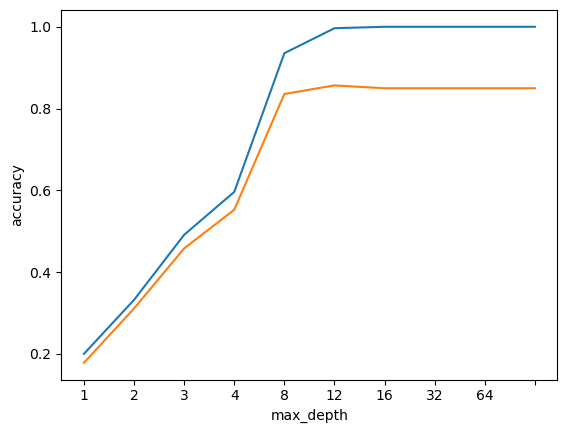

In [52]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = 100)
    model.fit(X_train, y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

In [29]:
# thus we determine the best max_depth will be 8/12

In [118]:
min_samples_split_list = [2, 5, 10, 20, 30, 50, 100, 200, 300]

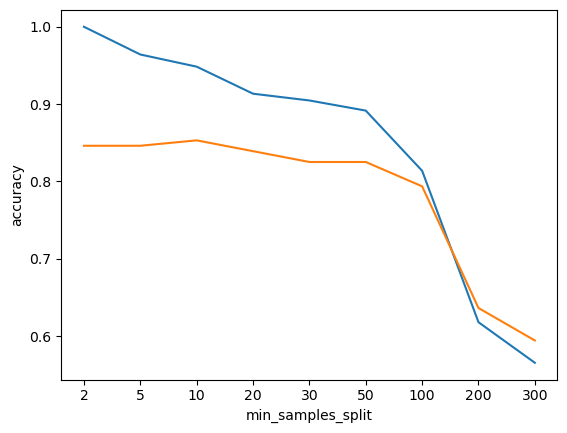

In [119]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = tree.DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 100)
    model.fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

In [ ]:
# thus we take best min_samples_split as 10/100

In [120]:
max_leaf_node = [5, 10, 25, 30, 40, 70, 100, 125, 150, 200, 300, 500, None]

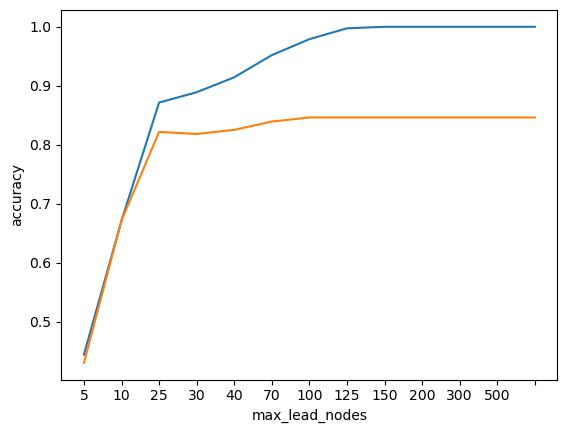

In [121]:
accuracy_list_train = []
accuracy_list_val = []
for max_lf in max_leaf_node:
    model = tree.DecisionTreeClassifier(max_leaf_nodes = max_lf, random_state = 100)
    model.fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    
plt.xlabel('max_lead_nodes')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_leaf_node)),labels=max_leaf_node)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

In [ ]:
# best param either 25 or 100

In [122]:
max_features_list = [1, 5, 10, 25, 50, 55, 64, 'auto', 'sqrt', 'log2', None]

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


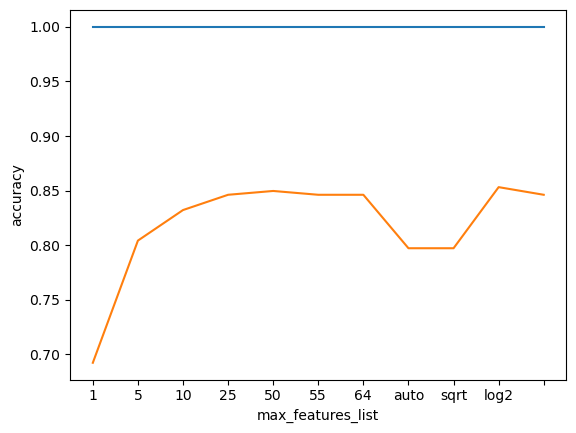

In [123]:
accuracy_list_train = []
accuracy_list_val = []
for max_f in max_features_list:
    model = tree.DecisionTreeClassifier(max_features = max_f, random_state = 100)
    model.fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.xlabel('max_features_list')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_features_list)),labels=max_features_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

In [64]:
# thus best param for max_features is 50 or none

In [68]:
min_imp_list = [0, 1, 2, 3, 4, 5, 10, 25, 50, 75, 100, 200, 300]

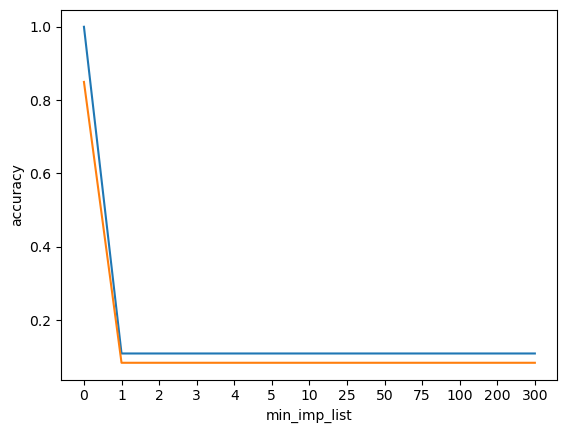

In [69]:
accuracy_list_train = []
accuracy_list_val = []
for min_imp in min_imp_list:
    model = tree.DecisionTreeClassifier(min_impurity_decrease = min_imp, random_state = 100)
    model.fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.xlabel('min_imp_list')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_imp_list)),labels=min_imp_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

In [ ]:
# only 0 works

In [108]:
final_model = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=8,
    min_samples_split=50,
    max_leaf_nodes=25,
    max_features=None,
    min_impurity_decrease = 0,
    random_state=100
)

In [166]:
final_model1 = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=12,
    min_samples_split=2,
    max_leaf_nodes=None,
    max_features=None,
    min_impurity_decrease = 0,
    random_state=100
)

In [203]:
final_model2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=12,
    min_samples_split=2,
    max_leaf_nodes=None,
    max_features=None,
    min_impurity_decrease = 0,
    random_state=45
)

In [204]:
final_model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12,
                       min_impurity_decrease=0, random_state=45)

In [205]:
print(accuracy_score(final_model2.predict(X_train),y_train))
print(accuracy_score(final_model2.predict(X_test),y_test))

1.0
0.8811188811188811


In [206]:
final_pred = final_model2.predict(test_data)
final_pred

array([6, 6, 5, 9, 0, 4, 7, 1, 0, 8, 3, 4, 7, 2, 3, 0, 3, 9, 4, 0, 2, 6,
       6, 3, 9, 4, 5, 0, 8, 7, 1, 7, 3, 4, 4, 4, 4, 8, 6, 5, 9, 9, 7, 4,
       3, 0, 0, 4, 3, 0, 9, 2, 6, 4, 8, 0, 1, 4, 9, 2, 7, 3, 9, 7, 4, 9,
       2, 9, 2, 4, 6, 0, 6, 8, 5, 0, 9, 7, 0, 9, 9, 0, 9, 8, 1, 4, 3, 5,
       4, 8, 0, 8, 1, 8, 6, 4, 2, 5, 6, 7, 7, 3, 6, 3, 2, 8, 5, 3, 9, 2,
       8, 1, 1, 7, 1, 8, 1, 4, 3, 5, 4, 1, 0, 1, 4, 4, 3, 1, 3, 2, 7, 6,
       9, 0, 8, 8, 6, 3, 1, 5, 6, 4, 8, 2, 7, 6, 9, 8, 3, 0, 5, 2, 1, 4,
       0, 1, 5, 3, 3, 4, 5, 0, 7, 4, 3, 4, 1, 6, 1, 5, 7, 0, 9, 2, 3, 4,
       1, 9, 6, 8, 6, 9, 9, 3, 0, 0, 1, 4, 5, 9, 8, 6, 2, 7, 3, 3, 9, 2,
       5, 2, 1, 3, 7, 3, 3, 1, 0, 3, 9, 3, 3, 2, 1, 0, 6, 9, 4, 9, 3, 2,
       1, 0, 5, 4, 4, 0, 1, 3, 8, 0, 4, 1, 0, 9, 1, 8, 5, 0, 1, 3, 1, 6,
       1, 8, 8, 7, 3, 8, 0, 3, 0, 3, 6, 2, 6, 2, 5, 9, 0, 3, 8, 1, 3, 5,
       4, 6, 2, 5, 2, 1, 3, 0, 8, 6, 9, 7, 3, 0, 3, 3, 1, 1, 4, 5, 8, 9,
       8, 0, 4, 6, 7, 0, 5, 2, 6, 0, 5, 2, 0, 3, 8,

In [207]:
ids = ss.iloc[:, 0]
ids.head()

0    1431
1    1432
2    1433
3    1434
4    1435
Name: ID, dtype: int64

In [208]:
df = pd.DataFrame({"ID": ids,
                 "Category": final_pred}) 

In [209]:
df.to_csv("submission3.csv", index = False)